In [239]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import dates as mdates
from matplotlib import ticker
from datetime import datetime

In [240]:
housing_df = pd.read_csv('MSPUS.csv')
income_df = pd.read_csv('MEHOINUSA646N.csv')

In [241]:
housing_df["DATE"] = pd.to_datetime(housing_df["DATE"], format="%Y-%m-%d")
income_df["DATE"] = pd.to_datetime(income_df["DATE"], format="%Y-%m-%d")

In [242]:
income_df.head()

,DATE,MEHOINUSA646N
0,1963-01-01,6200
1,1964-01-01,6400
2,1965-01-01,6900
3,1966-01-01,7400
4,1967-01-01,7200


In [243]:
housing_df.tail()

,DATE,MSPUS
228,2020-01-01,329000.0
229,2020-04-01,322600.0
230,2020-07-01,337500.0
231,2020-10-01,358700.0
232,2021-01-01,369800.0


In [244]:
magnitude = []
for i in range(len(income_df)):
    magnitude.append(housing_df.iloc[i*4]["MSPUS"] / income_df.iloc[i]["MEHOINUSA646N"])

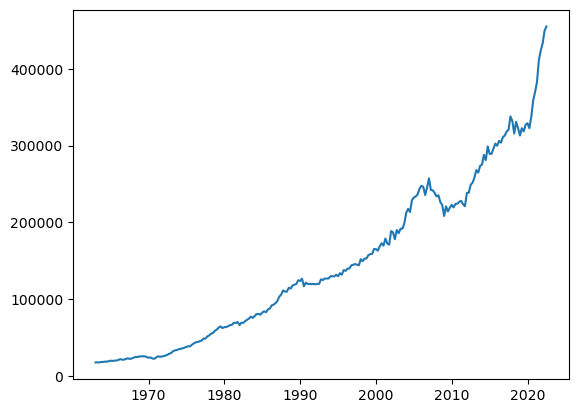

In [70]:
plt.plot(housing_df["DATE"], housing_df["MSPUS"])

(0.0, 500390.00000000006)

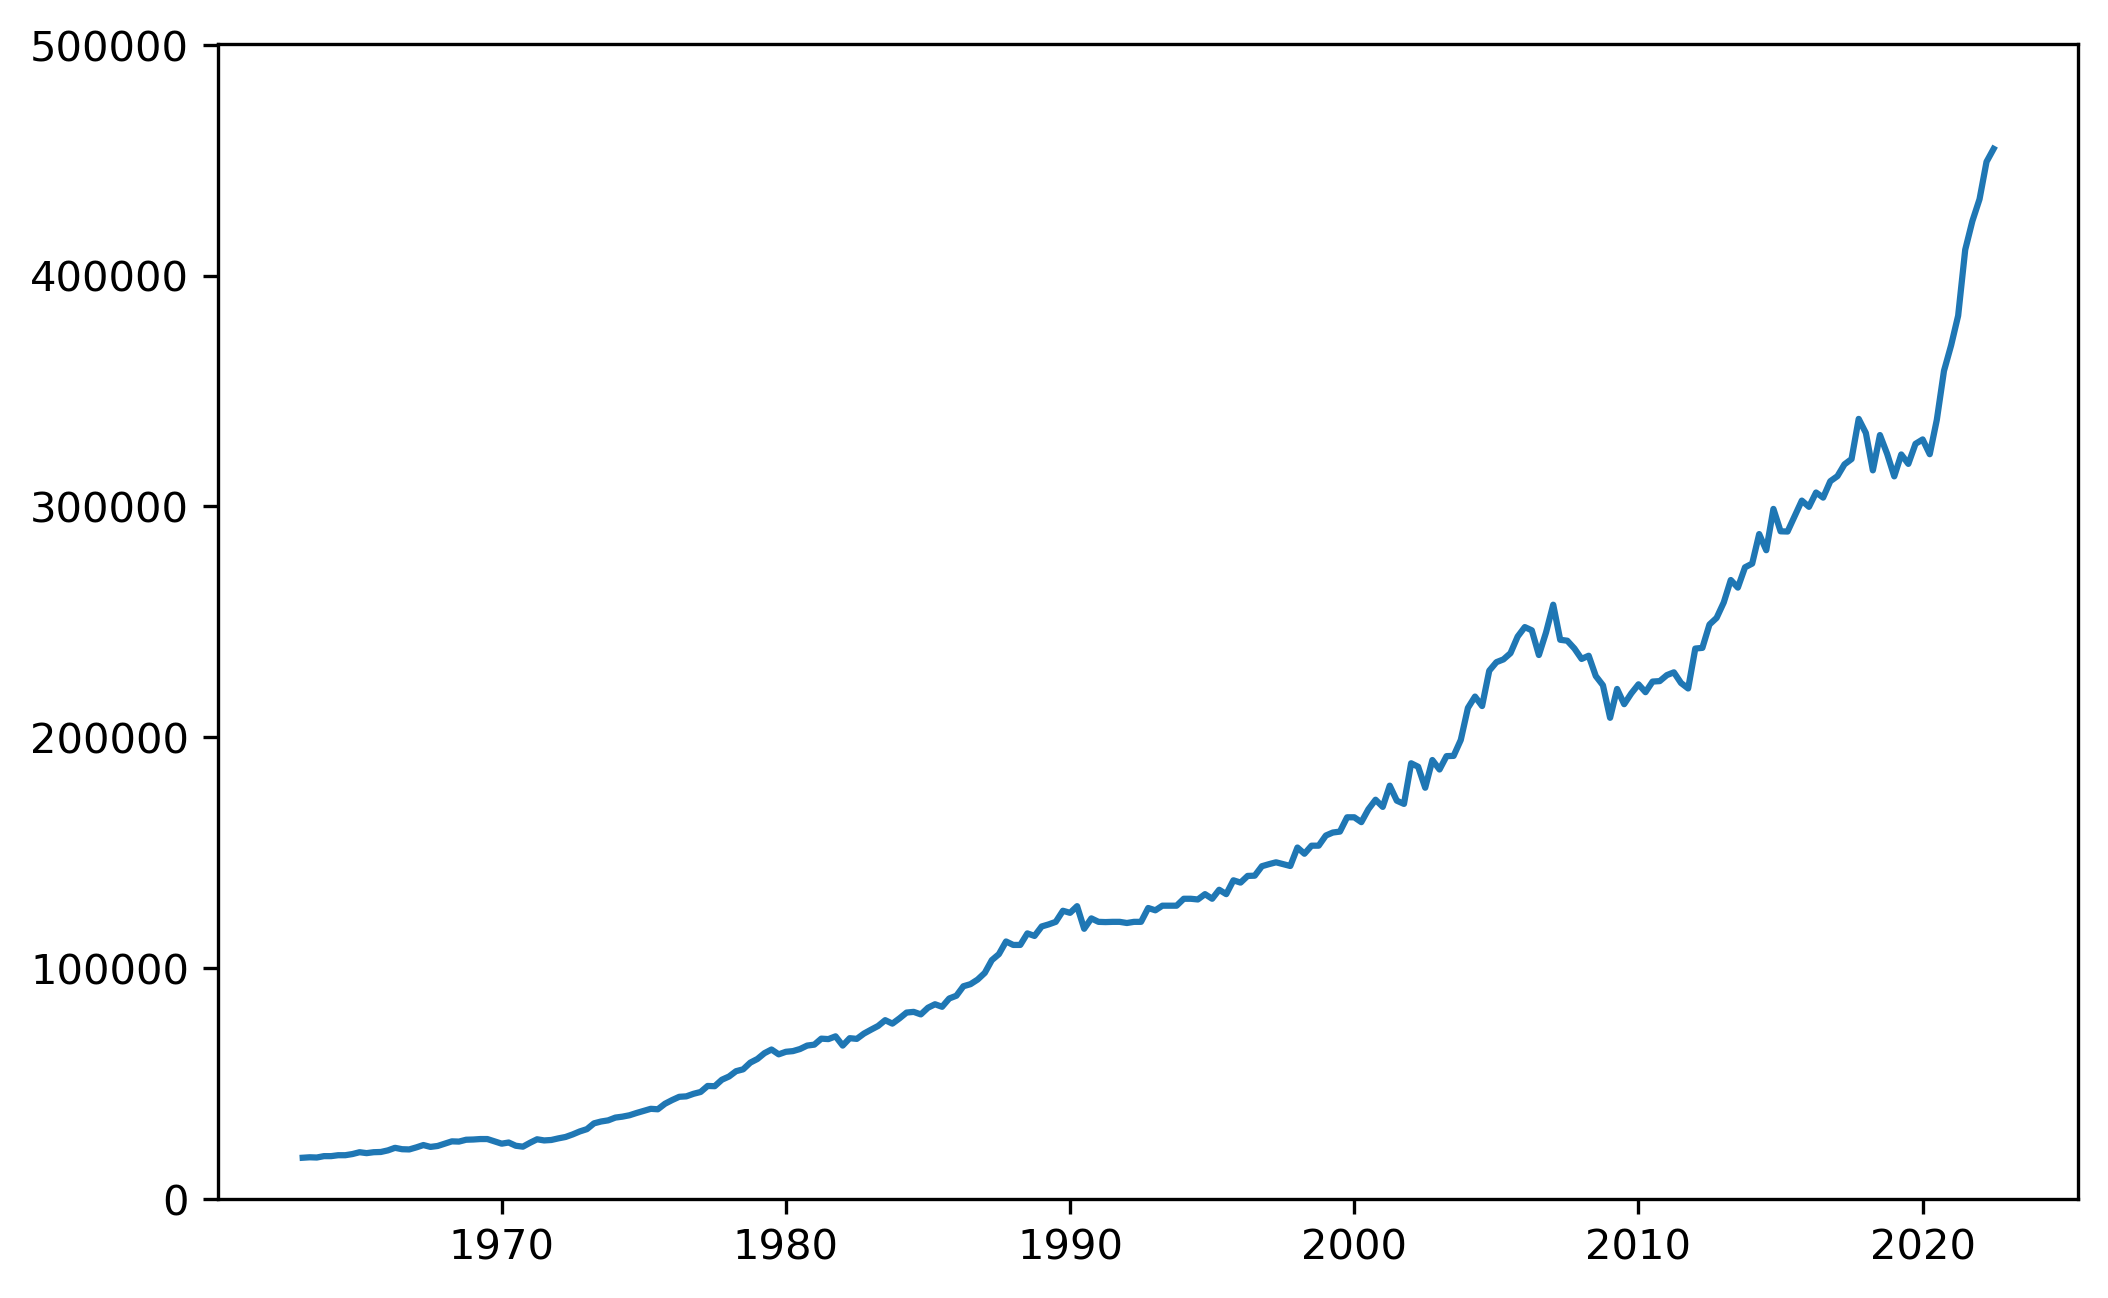

In [71]:
plt.figure(figsize=(8, 5), dpi=300)
plt.plot(housing_df["DATE"], housing_df["MSPUS"])
plt.ylim([0, housing_df["MSPUS"].max() * 1.1])

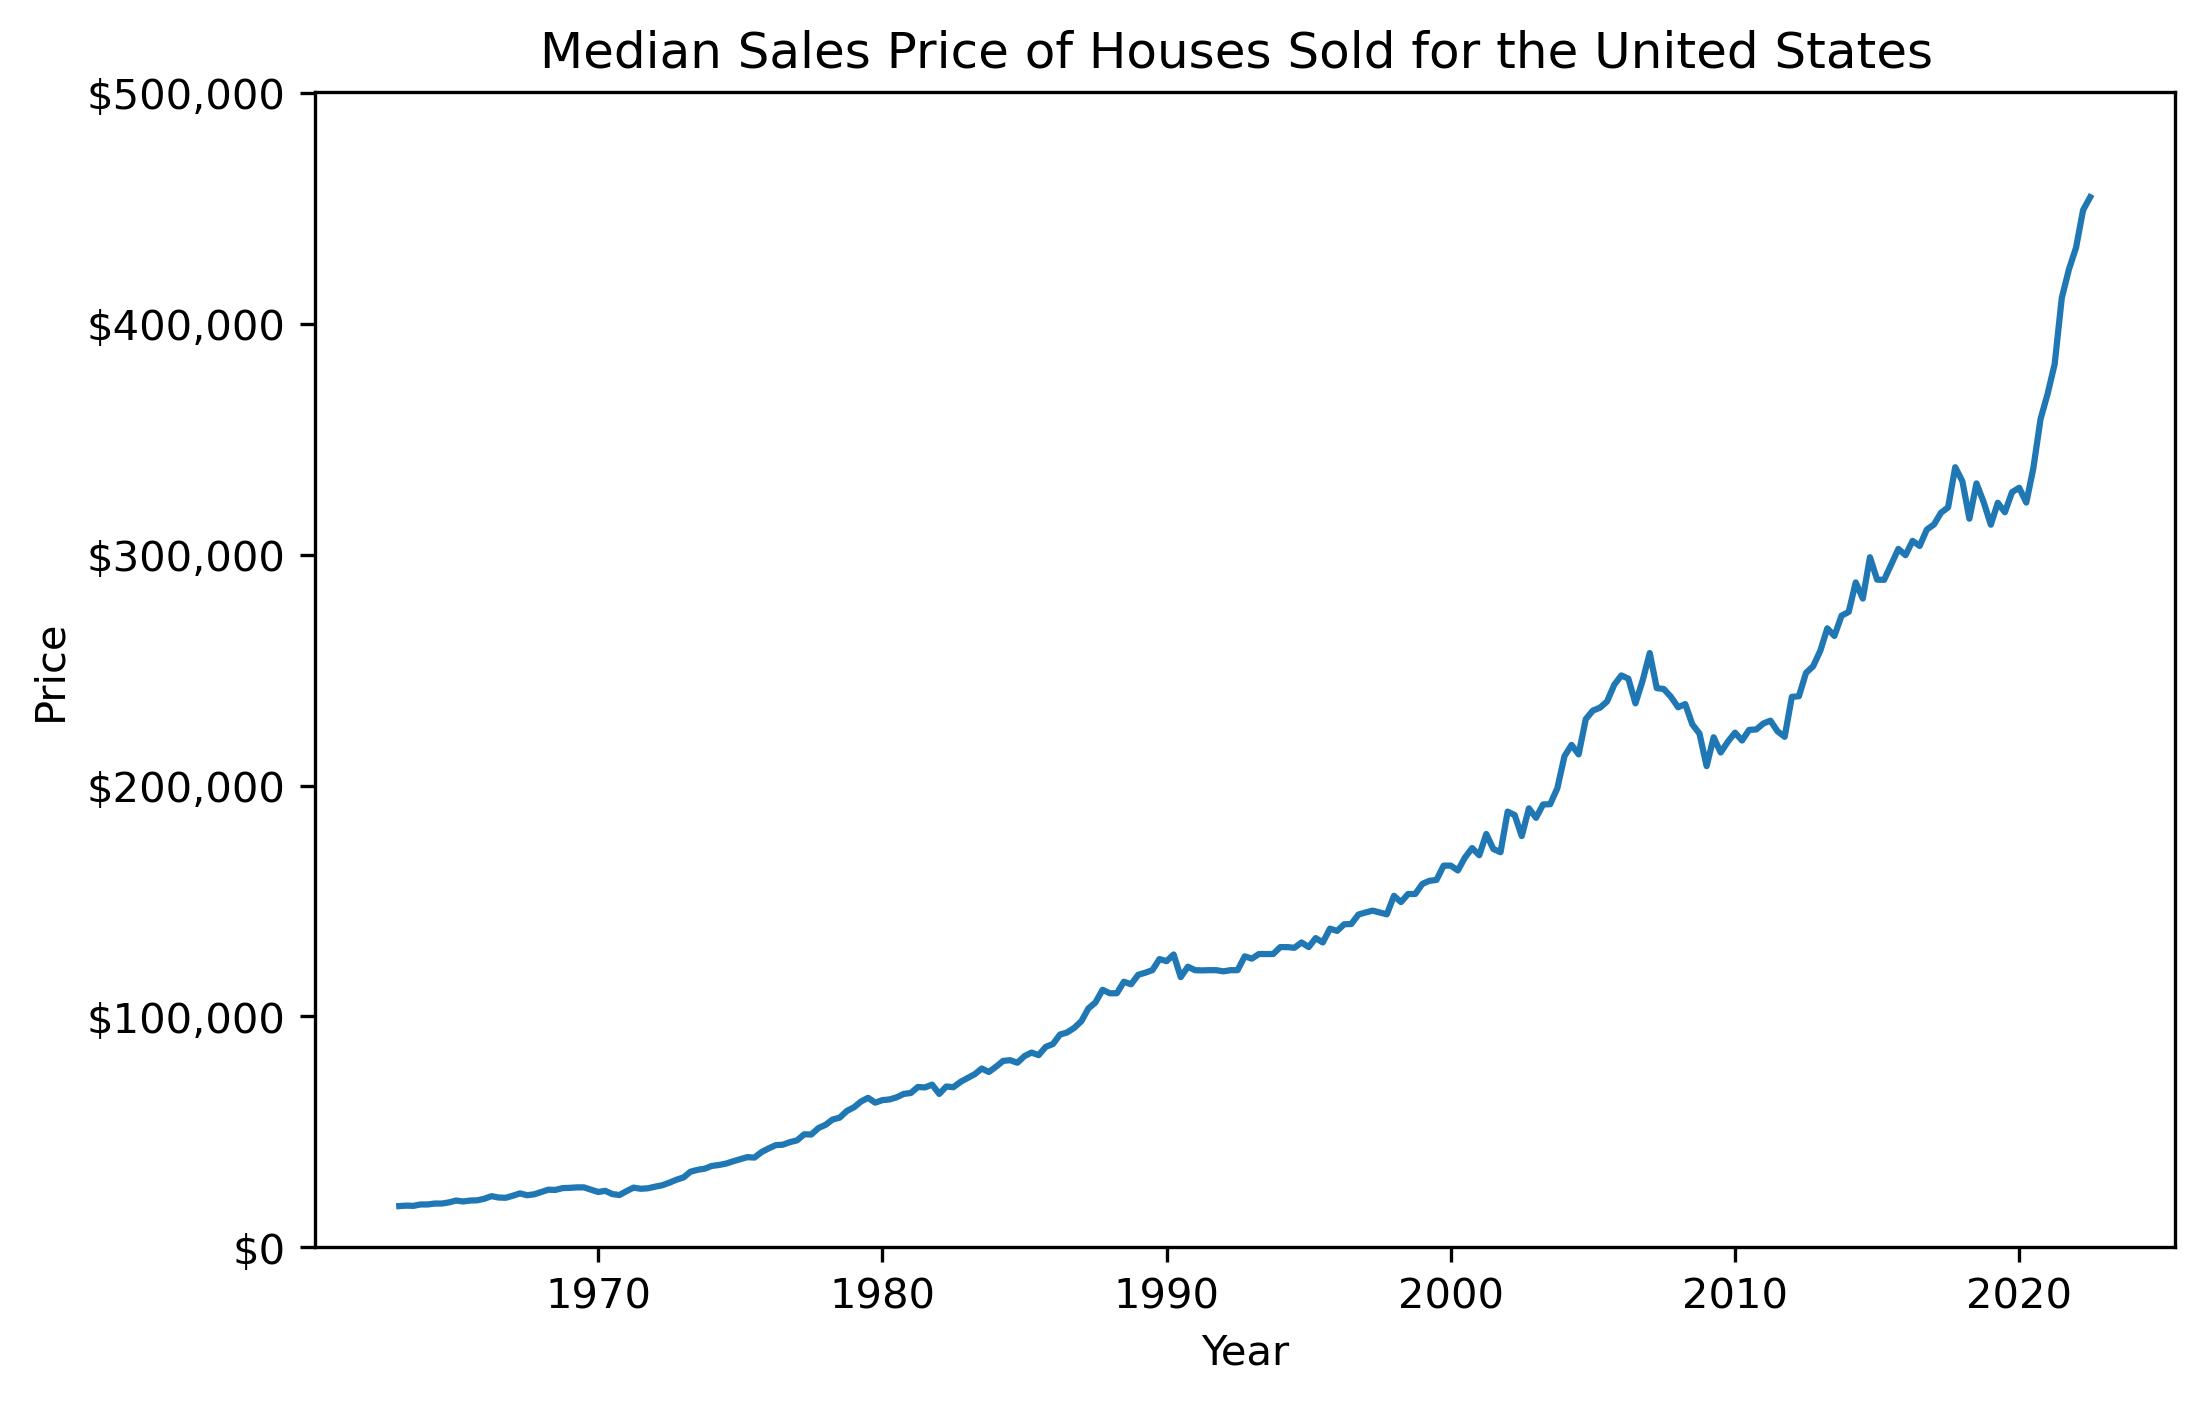

In [93]:
ymax = int(housing_df['MSPUS'].max() * 1.1 // 1)
fig, ax = plt.subplots(figsize=(8, 5), dpi=300)
plt.plot(housing_df["DATE"], housing_df["MSPUS"])
ax.set_ylim([0, ymax])
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter(u"${x:,}"))
plt.yticks(range(0, ymax, 100_000))
plt.title("Median Sales Price of Houses Sold for the United States ")
plt.xlabel("Year")
plt.ylabel("Price")
plt.show()

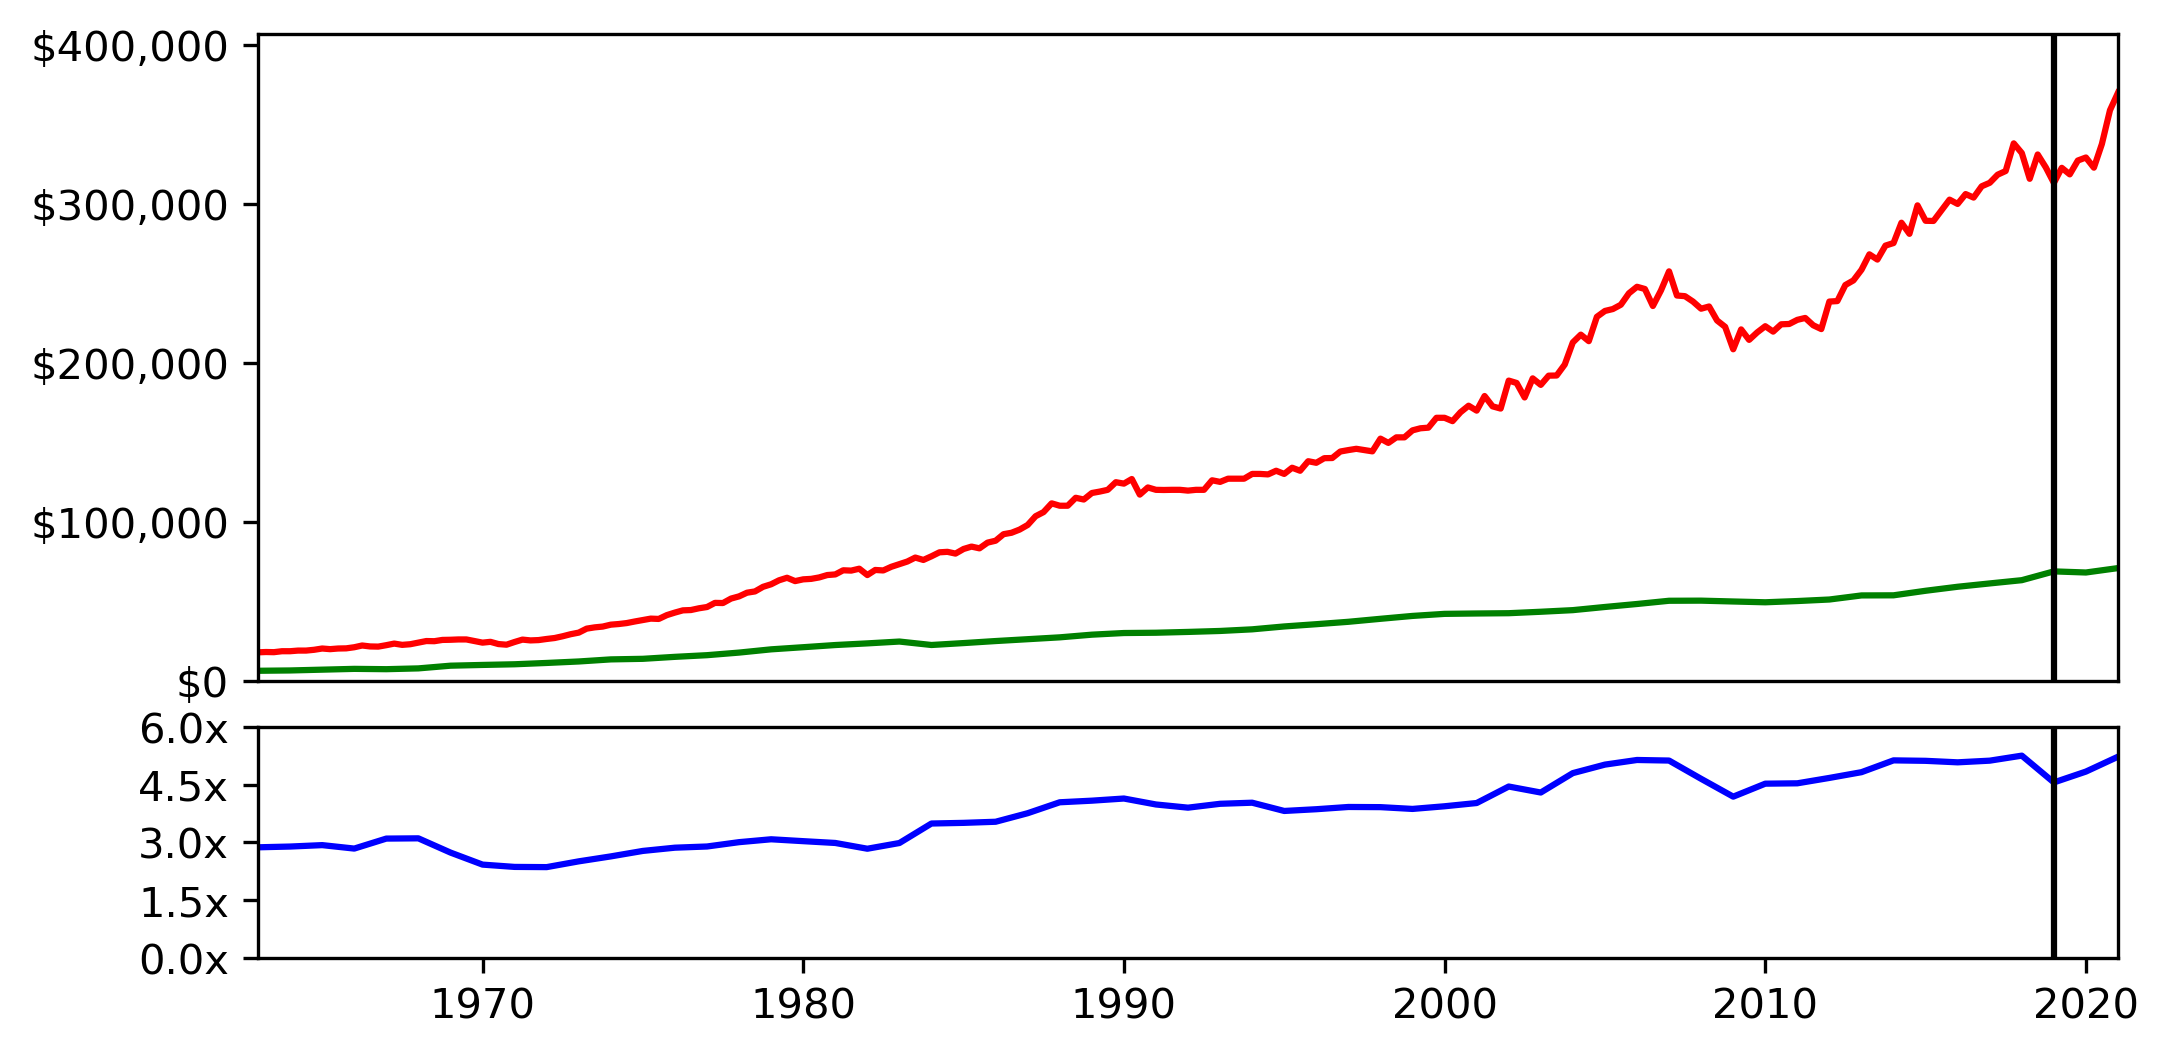

In [247]:
date = pd.Timestamp("2019-01-01")
rows = 7
fig, ax = plt.subplots(figsize=(8, 4), constrained_layout=False, dpi=300)

xmin = housing_df['DATE'].min()
xmax = housing_df['DATE'].max()

grid = plt.GridSpec(
    nrows=rows,
    ncols=1,
    wspace=0,
    hspace=0.5,
    figure=fig
)
main = plt.subplot(grid[:5, 0])
sub = plt.subplot(grid[5:, 0])
main.plot(housing_df["DATE"], housing_df["MSPUS"], color="red")
main.plot(income_df["DATE"], income_df["MEHOINUSA646N"], color="green")
main.vlines(date, ymin=0, ymax=1e20, color="#000000")
sub.plot(income_df["DATE"], magnitude, color="blue")
sub.vlines(date, ymin=0, ymax=1e20, color="#000000")

main_ymax = int(housing_df['MSPUS'].max() * 1.1 // 1)
sub_ymax = max(magnitude) * 1.1

main.set_xlim([xmin, xmax])
main.set_xticks([])
main.set_ylim([0, main_ymax])
main.yaxis.set_major_formatter(ticker.StrMethodFormatter(u"${x:,}"))
main.set_yticks(range(0, main_ymax, 100_000))

sub.set_xlim([xmin, xmax])
sub.set_ylim([0, sub_ymax])
sub.yaxis.set_major_formatter(ticker.StrMethodFormatter(u"{x:}x"))
sub.set_yticks(np.linspace(0, round(sub_ymax), 5))
plt.show()

In [250]:
!pip install gif --q

In [280]:
import gif

@gif.frame
def plot(date, i):
    rows = 7
    fig, ax = plt.subplots(figsize=(8, 4), constrained_layout=False, dpi=300)
    fig.suptitle("Affordability of Housing in the United States")

    xmin = housing_df['DATE'].min()
    xmax = housing_df['DATE'].max()
    
    h_df = housing_df[housing_df["DATE"] <= date]
    i_df = income_df[income_df["DATE"] <= date]
    m = magnitude[:i]

    grid = plt.GridSpec(
        nrows=rows,
        ncols=1,
        wspace=0,
        hspace=0.5,
        figure=fig
    )
    main = plt.subplot(grid[:5, 0])
    sub = plt.subplot(grid[5:, 0])
    main.plot(h_df["DATE"], h_df["MSPUS"], color="red", label="median home price")
    main.plot(i_df["DATE"], i_df["MEHOINUSA646N"], label="median income")
    main.legend()
    main.vlines(date, ymin=0, ymax=1e20, color="#000000")
    sub.plot(i_df["DATE"], m, color="blue")
    sub.vlines(date, ymin=0, ymax=1e20, color="#000000")

    main_ymax = int(housing_df['MSPUS'].max() * 1.1 // 1)
    sub_ymax = max(magnitude) * 1.1

    main.set_xlim([xmin, xmax])
    main.set_xticks([])
    main.set_ylim([0, main_ymax])
    main.yaxis.set_major_formatter(ticker.StrMethodFormatter(u"${x:,}"))
    main.set_yticks(range(0, main_ymax, 100_000))
    main.set_ylabel("Dollars")

    sub.set_xlim([xmin, xmax])
    sub.set_ylim([0, sub_ymax])
    sub.yaxis.set_major_formatter(ticker.StrMethodFormatter(u"{x:}x"))
    sub.set_yticks(np.linspace(0, round(sub_ymax), 5))
    sub.set_xlabel("Year")
    sub.set_ylabel("Magnitude")

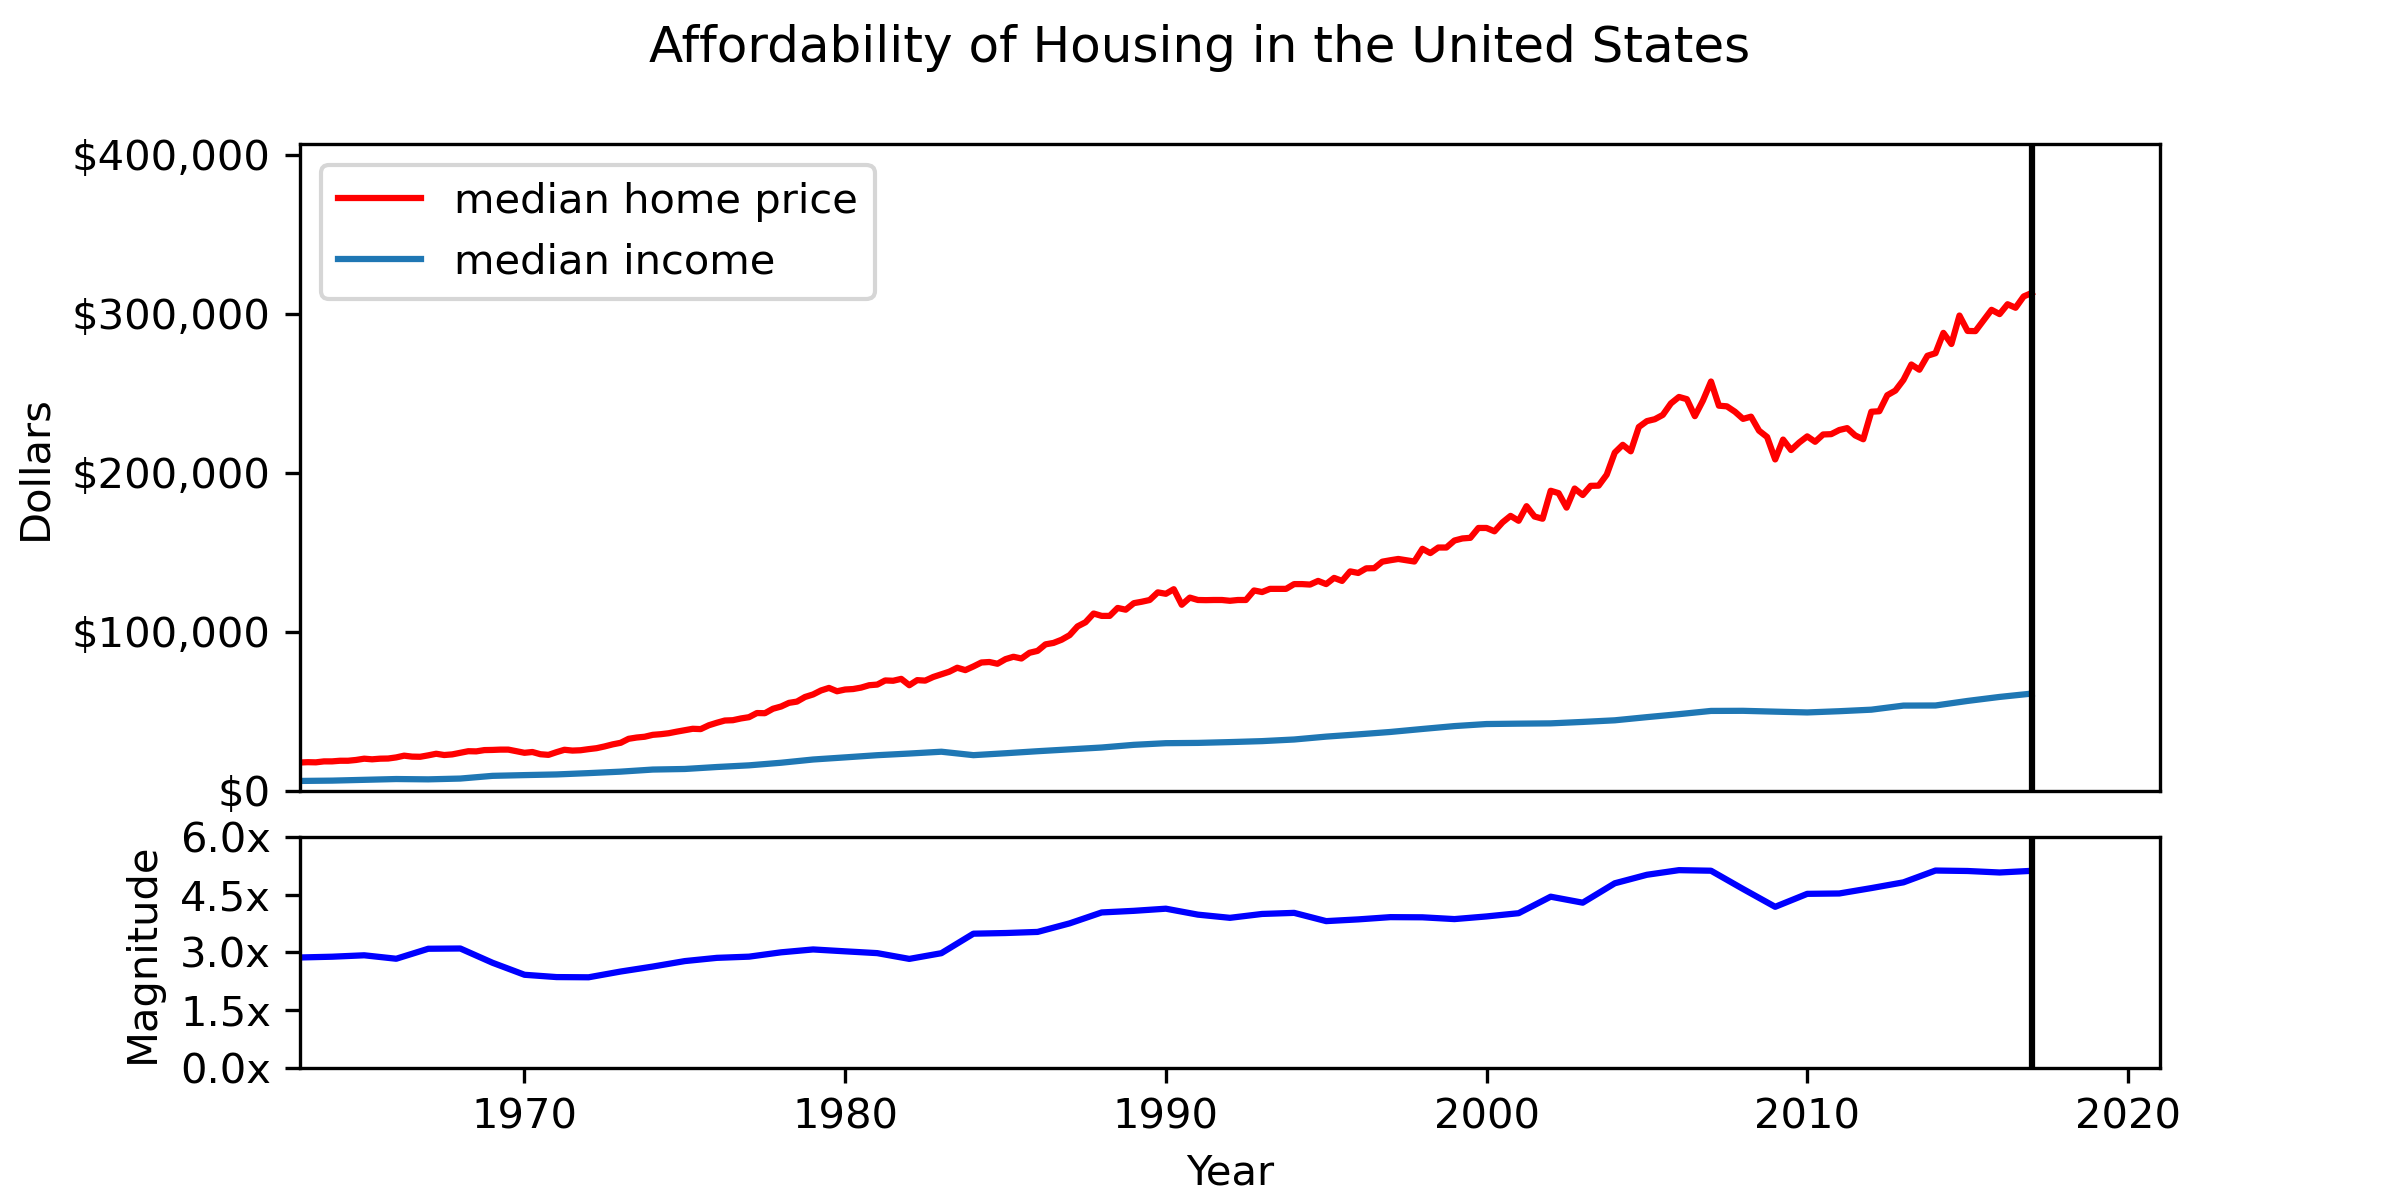

In [281]:
plot(pd.Timestamp("2017-01-01"), 2017-1963+1)

In [282]:
dates = pd.date_range(income_df['DATE'].min(), income_df['DATE'].max(), freq="1YS")
frames = [plot(date, i+1) for i, date in enumerate(dates)]

In [286]:
gif.save(frames, "affordable_housing.gif", duration=5)

In [287]:
from PIL import Image
im = Image.open('affordable_housing.gif')

![Alt Text](./affordable_housing.gif)